In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime
%matplotlib inline

In [2]:
low_memory=False
file_to_load = "world_mask_mandates.csv"
# Read Purchasing File and store into Pandas data frame
data_raw= pd.read_csv(file_to_load)
data_raw.head()

C:\Users\USApul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,39,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined_numeric,C1_combined,C2_combined_numeric,C2_combined,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# # Formating Date column.
# data_raw['Date'] = pd.to_datetime(data_raw['Date'],format ='%Y%m%d')
# data_raw['H6_combined'] = data_raw.to_string(data_raw['H6_combined'])

In [4]:
data_reduced= data_raw[['CountryName','Jurisdiction','Date','H6_combined_numeric','H6_combined']]
data_reduced.head(5)

,CountryName,Jurisdiction,Date,H6_combined_numeric,H6_combined
0,Aruba,NAT_TOTAL,20200101,0.0,0
1,Aruba,NAT_TOTAL,20200102,0.0,0
2,Aruba,NAT_TOTAL,20200103,0.0,0
3,Aruba,NAT_TOTAL,20200104,0.0,0
4,Aruba,NAT_TOTAL,20200105,0.0,0


In [5]:
data_reduced.dtypes

CountryName             object
Jurisdiction            object
Date                     int64
H6_combined_numeric    float64
H6_combined             object
dtype: object

In [6]:
# Formating Date column.
data_reduced['Date'] = pd.to_datetime(data_reduced['Date'],format ='%Y%m%d')

C:\Users\USApul\AppData\Local\Temp/ipykernel_34632/2983199073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['Date'] = pd.to_datetime(data_reduced['Date'],format ='%Y%m%d')


In [7]:
# Framinf the date range
A = '2020-01-01'
B = '2021-12-31'
data_truncated = data_reduced.loc[(data_reduced['Date'] >= A) & (data_reduced['Date'] <= B)]
data_truncated.head(5)

,CountryName,Jurisdiction,Date,H6_combined_numeric,H6_combined
0,Aruba,NAT_TOTAL,2020-01-01,0.0,0
1,Aruba,NAT_TOTAL,2020-01-02,0.0,0
2,Aruba,NAT_TOTAL,2020-01-03,0.0,0
3,Aruba,NAT_TOTAL,2020-01-04,0.0,0
4,Aruba,NAT_TOTAL,2020-01-05,0.0,0


In [8]:
data_six = data_truncated.loc[data_truncated['CountryName'].isin(['United States','Canada','Germany','India',
                                                                  'Japan','Sweden']) & data_truncated['Jurisdiction'].isin(['NAT_TOTAL']) ]

In [9]:
usa_df = data_six.loc[data_truncated['CountryName'].isin(['United States'])]
x_usa = usa_df[['H6_combined_numeric']]
dates_usa = usa_df[['Date']]

canada_df = data_six.loc[data_truncated['CountryName'].isin(['Canada'])]
x_canada = canada_df[['H6_combined_numeric']]
dates_canada = canada_df[['Date']]

germany_df = data_six.loc[data_truncated['CountryName'].isin(['Germany'])]
x_germany = germany_df[['H6_combined_numeric']]
dates_germany = germany_df[['Date']]

japan_df = data_six.loc[data_truncated['CountryName'].isin(['Japan'])]
x_japan = japan_df[['H6_combined_numeric']]
dates_japan = japan_df[['Date']]

india_df = data_six.loc[data_truncated['CountryName'].isin(['India'])]
x_india = india_df[['H6_combined_numeric']]
dates_india = india_df[['Date']]

sweden_df = data_six.loc[data_truncated['CountryName'].isin(['Sweden'])]
x_sweden = sweden_df[['H6_combined_numeric']]
dates_sweden = sweden_df[['Date']]

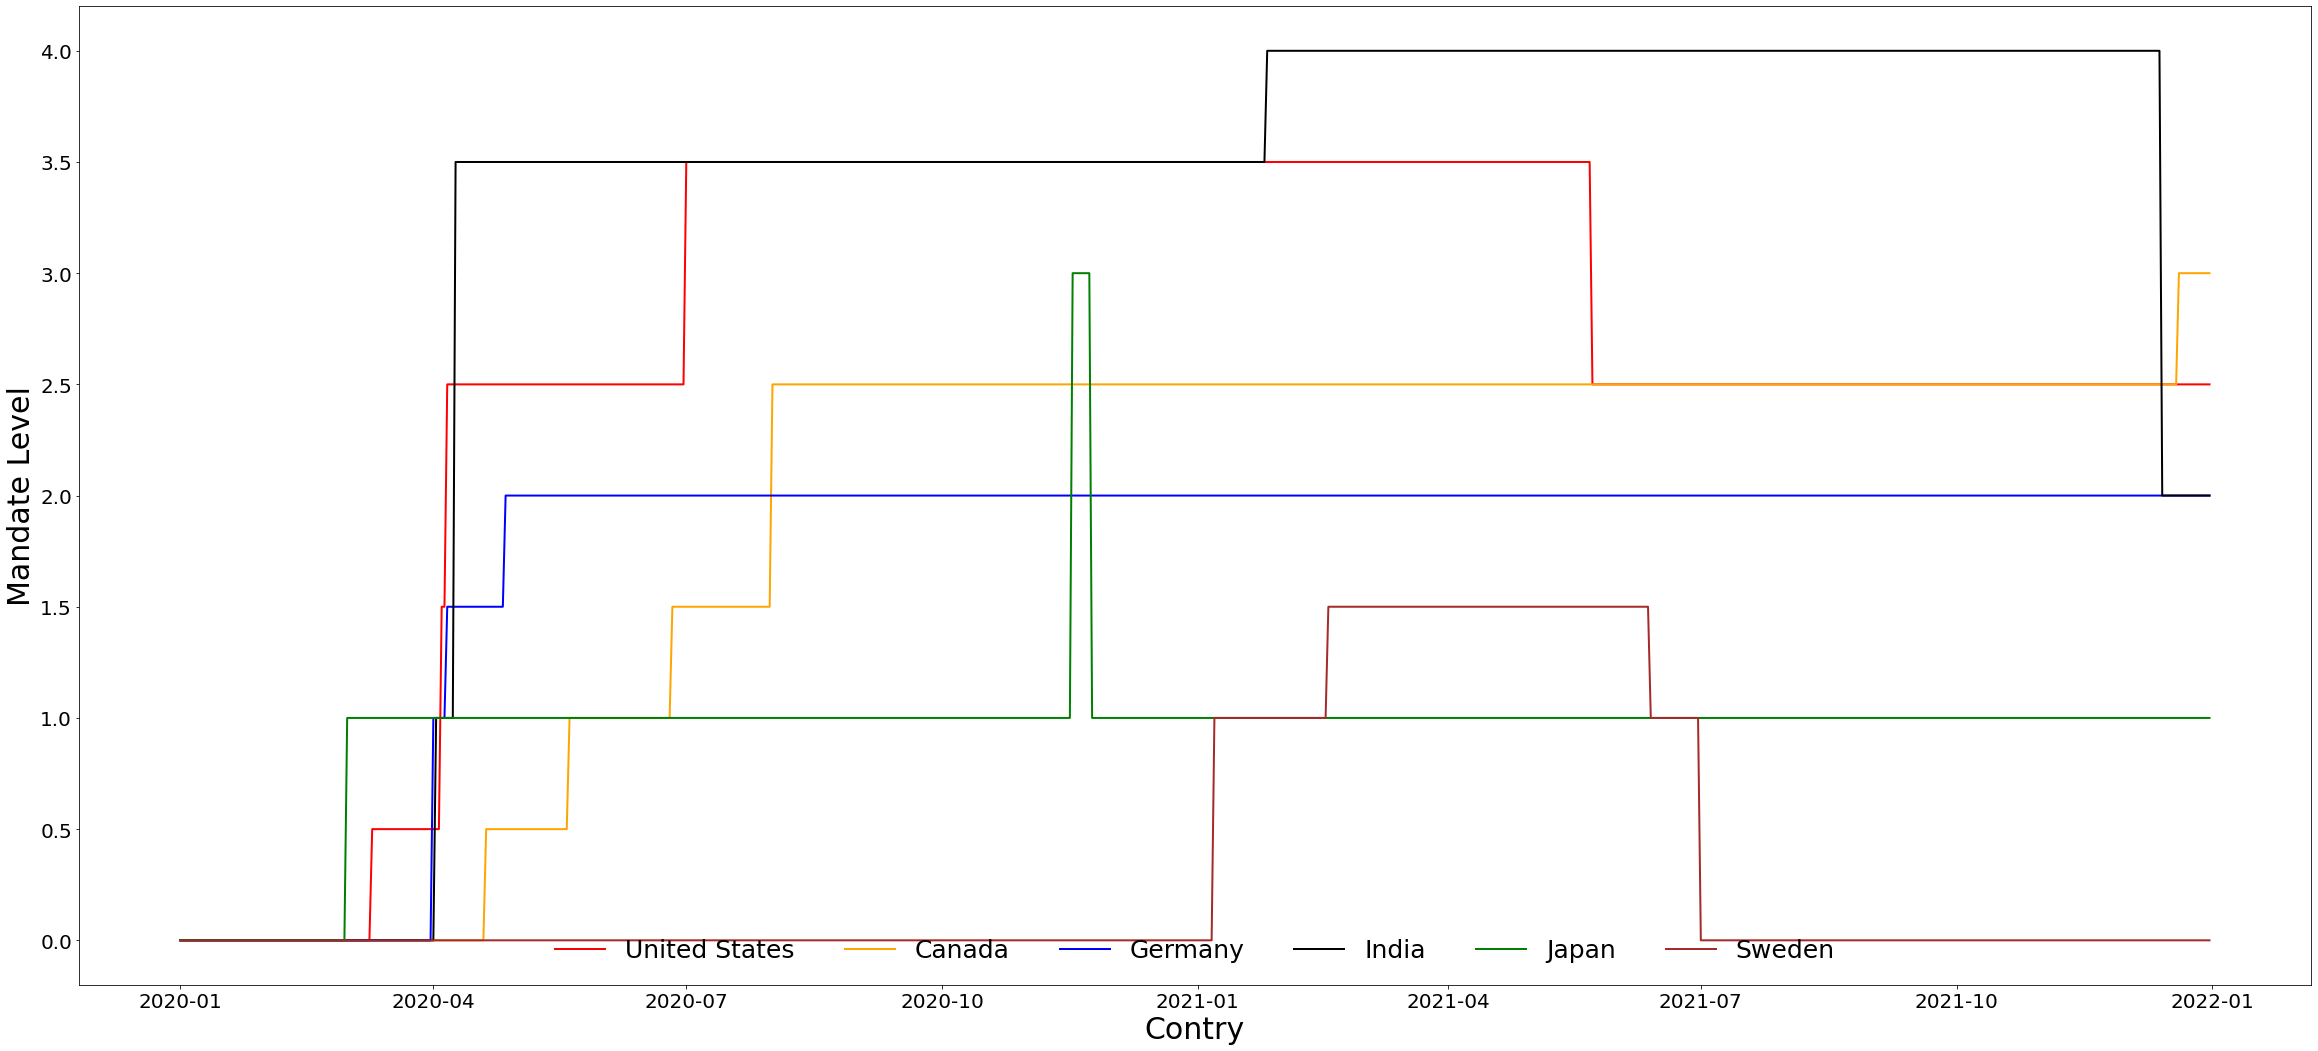

In [11]:
plt.subplots(figsize=(40, 18))
plt.plot(dates_usa,x_usa,linewidth=2, markersize=10,color="red")
plt.plot(dates_canada,x_canada,linewidth=2, markersize=10,color="orange")
plt.plot(dates_germany,x_germany,linewidth=2, markersize=10,color="blue")
plt.plot(dates_india,x_india,linewidth=2, markersize=10,color="k")
plt.plot(dates_japan,x_japan,linewidth=2, markersize=10,color="green")
plt.plot(dates_sweden,x_sweden,linewidth=2, markersize=10,color="brown")
plt.gca().legend(('United States','Canada','Germany','India','Japan','Sweden'),
                 frameon=False, loc='lower center', ncol=6,fontsize=25)
plt.xlabel('Contry', fontsize=30)
plt.ylabel('Mandate Level', fontsize=30)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.savefig("Mandates_six_cities.png")

In [ ]:
canada_df = data_six.loc[data_truncated['CountryName'].isin(['Canada'])]
x_axis = canada_df[['H6_combined_numeric']]
dates = canada_df[['Date']]

plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

In [ ]:
germany_df = data_six.loc[data_truncated['CountryName'].isin(['Germany'])]
x_axis = germany_df[['H6_combined_numeric']]
dates = germany_df[['Date']]

plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

In [ ]:
japan_df = data_six.loc[data_truncated['CountryName'].isin(['Japan'])]
x_axis = japan_df[['H6_combined_numeric']]
dates = japan_df[['Date']]

plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

In [ ]:
india_df = data_six.loc[data_truncated['CountryName'].isin(['India'])]
x_axis = india_df[['H6_combined_numeric']]
dates = india_df[['Date']]

plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

In [ ]:
sweden_df = data_six.loc[data_truncated['CountryName'].isin(['Sweden'])]
x_axis = sweden_df[['H6_combined_numeric']]
dates = sweden_df[['Date']]

plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")